<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

## Импорт библиотек и модулей, подключение к БД

In [1]:
!pip install psycopg2
import pandas as pd
import psycopg2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Здесь вставить параметры для подключения


In [5]:
# Подключение к БД
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Некоторые пояснения по оформлению кода:
*1. Текст запроса будем записывать через f-строку в переменную query_n_m, где n и m номер юнита и задачи в нем соответственно.
2. Результат выполнения запроса сохраняем в datadrame с именем result_n_m, где n и m номер юнита и задачи в нем соответственно.*

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [6]:
# текст запроса
query_3_1 = f'''
select
    count(*)
from
    public.vacancies
'''
result_3_1 = pd.read_sql_query(query_3_1, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\3576417028.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3_1 = pd.read_sql_query(query_3_1, connection)


In [7]:
# результат запроса
result_3_1

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [8]:
# текст запроса
query_3_2 = f'''
-- просто считаем количество записей в таблице
select 
    count(*)
from 
    public.employers
'''
result_3_2 = pd.read_sql_query(query_3_2, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\1090122750.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3_2 = pd.read_sql_query(query_3_2, connection)


In [9]:
# результат запроса
result_3_2

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [10]:
# текст запроса
query_3_3 = f'''
-- просто считаем количество записей в таблице
select 
    count(*)
from 
    public.areas
'''
result_3_3 = pd.read_sql_query(query_3_3, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\251882499.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3_3 = pd.read_sql_query(query_3_3, connection)


In [11]:
# результат запроса
result_3_3

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [12]:
# текст запроса
query_3_4 = f'''
-- просто считаем количество записей в таблице
select 
    count(*)
from 
    public.industries
'''
result_3_4 = pd.read_sql_query(query_3_4, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\882140143.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_3_4 = pd.read_sql_query(query_3_4, connection)


In [13]:
# результат запроса
result_3_4

,count
0,294


***

# Выводы по предварительному анализу данных


*Первичный анализ данных показывает, что в среднем на одного работодателя приходится чуть более 2 опубликованных вакансий. Конечно, это грубое приближение и далее будут представлены более детальные результаты. На этапе знакомства с данными представим визуально некоторые обобщающие показатели:
-среднее число вакансии на 1 работодателя;
-среднее число вакансий на 1 регион;
-среднее число вакансий на 1 отрасль.
Данные внесем во временный датафрейм-источник визуализации.*

In [14]:
# создадим временный словарь для хранения расчитанных показателей
tmp_dict = {}

# добавим в словарь среднее число вакансий на 1 работодателя
value = round(result_3_1.iloc[0,0] / result_3_2.iloc[0,0])
tmp_dict['Среднее число вакансий на 1 работодателя'] = value

# добавим в словарь среднее число вакансий на 1 регион
value = round(result_3_1.iloc[0,0] / result_3_3.iloc[0,0])
tmp_dict['Среднее число вакансий на 1 регион'] = value

# добавим в словарь среднее число вакансий по отраслям
value = round(result_3_1.iloc[0,0] / result_3_4.iloc[0,0])
tmp_dict['Среднее число вакансий на 1 отрасль'] = value

# перенесем данные словаря в датафрейм

tmp_df = pd.DataFrame(list(tmp_dict.items()),
                   columns=['Показатель', 'Значение, ед.'])

# визуализируем показатели
fig = px.bar(
    data_frame = tmp_df,
    x = 'Показатель',
    y = 'Значение, ед.',
    title = 'Средние показатели базы вакансий')
fig.show()
fig.write_html('graphs/Визуализация_1.html')

*График наглядно дает общее представление сотношении числа вакансий, работодателей, отраслей и регионов*

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [15]:
# текст запроса
query_4_1 = f'''
-- вывод количества вакансий и названий регионов
select
    count(*) cnt,
    a.name
from
    -- основной таблицей сделаем Вакансии, соединяем с Регионами
    public.vacancies v
    join public.areas a on v.area_id = a.id -- количество вакансий считаем в разрезе регионов
group by
    a.id -- сортируем по количеству вакансий от большего к меньшему
order by
    cnt desc -- в выводе оставим только top-5
limit
    5
'''
result_4_1 = pd.read_sql_query(query_4_1, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\3495120029.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [16]:
# результат запроса
result_4_1

,cnt,name
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [17]:
# текст запроса
query_4_2 = f'''
select
    count(*)
from
    public.vacancies v
where
-- учитываем только те записи, где не пусто хотя бы одно из полей с зарплатой
    v.salary_from is not null
    or v.salary_to is not null
'''
result_4_2 = pd.read_sql_query(query_4_2, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\645280818.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [18]:
# результат запроса
result_4_2

,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [19]:
# текст запроса
query_4_3 = f'''
select
-- выводим средние значения зарплаты (от и до), округленые до целых
    round(avg(v.salary_from), 0) min_average,
    round(avg(v.salary_to), 0) max_average
from
    public.vacancies v
where
-- учитываем только те записи, где не пусто хотя бы одно из полей с зарплатой
    v.salary_from is not null
    or v.salary_to is not null   
'''
result_4_3 = pd.read_sql_query(query_4_3, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\2798837641.py:14: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [20]:
# результат запроса
result_4_3

,min_average,max_average
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [21]:
# текст запроса
query_4_4 = f'''
select
    -- выводим количество, тип рабочего графика и тип трудоустройства
    count(*) as cnt,
    v.schedule,
    v.employment
from
    public.vacancies v
group by
    -- для расчета количества группируем записи по типу рабочего графика  и типу трудоустройства
    v.schedule,
    v.employment
order by
    -- сортируем по убыванию количества
    cnt desc
offset
    -- пропускам первую запись и выводим вторую
    1
limit
    1
'''
result_4_4 = pd.read_sql_query(query_4_4, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\596291920.py:23: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [22]:
# результат запроса
result_4_4

,cnt,schedule,employment
0,7802,Удаленная работа,Полная занятость


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [23]:
# текст запроса
query_4_5 = f'''
select
-- выводим количество вакансий и требуемый опыт
    count(*) as cnt,
    v.experience
from
    public.vacancies v
group by
-- для подсчета количества вакансий группируем записи по требуемому опыту
    v.experience
order by
-- сортируем по количеству вакансий
    cnt
'''
result_4_5 = pd.read_sql_query(query_4_5, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\2545687574.py:16: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [24]:
# результат запроса
result_4_5

,cnt,experience
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


***

# Выводы по детальному анализу вакансий

*Сделанные ранее выводы о среднем количестве вакансий по регионам теперь уточняются. Ожидаемо, что есть регионы,
в которых количество вакансий сильно сильно больше по сравнению с остальными. Ожидаемо, это Москва и Санкт-Петербург, как
наибольшие рынки труда в России. Представим визуально топ-5 городов по числу вакансий.*

In [25]:
# визуализация данных df result_4_1
fig = px.bar(
    data_frame = result_4_1,
    x = 'name',
    y = 'cnt',
    title = 'Top-5 городов по числу вакансий',
    labels={'cnt':'Количество', 'name':'Город'})
fig.show()
fig.write_html('graphs/Визуализация_2.html')

*Видно, что помимо двух крупнейших городов России, в топ-5 по числу вакансий вошли также Минск, в котором актвино развивается
ИТ-сфера, научный центр Сибири - Новосибирск, а также крупнейший город Казахстана - Алматы. В целом, наиболее ичсло вакансий
характерно для столичных городов, что связано с масштабом их рынка труда.*

*Интересно рассмотреть также распределение заработной платы, как ее нижней границы, так и верхней.
Посмотрим на показатели вариации зарплаты.*

In [26]:
# преобразуем данные о ЗП для удобства построения ящика с усами по двум столбцам - salary_from и salary_to.
# Для этого объединим столбцы:

query_tmp = f'''
select
-- выводим ЗП от
    v.salary_from Salary,
    'ЗП от, руб.' Category
from
    public.vacancies v
where
-- учитываем только те записи, где ЗП указана
    v.salary_from is not null
union
select
-- выводим ЗП до
    v.salary_to,
    'ЗП до, руб.'
from
    public.vacancies v
where
-- учитываем только те записи, где ЗП указана
    v.salary_to is not null
'''
result_tmp = pd.read_sql_query(query_tmp, connection)

# визуализация данных df result_tmp
fig = px.box(
    data_frame = result_tmp,
    x = 'salary',
    y = 'category',
    title = 'Вариация ЗП ОТ и ДО',
    labels={'salary':'ЗП, руб.', 'category':'От/До'})
fig.show()
fig.write_html('graphs/Визуализация_3.html')


C:\Users\user\AppData\Local\Temp\ipykernel_7340\2966606069.py:25: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



*Диаграмма показывает, что медианный уровень минимальных зарплат (От) составляет 48,1 тыс, руб. при этом большая часть предложений с минимальной ЗП от 28,4 до 84,8 тыс. руб. По уровню максимальной запрлаты мединное значение равно 59,7 тыс. руб. с преобладающим количеством вакансий в диапазоне от 37,1 до 123,3 тыс. руб.
Такими границами ЗП описывается предложение на массовом сегменте. Есть незначительное количество вакансий, скорее исключений,
в которых уровень предлагамой ЗП, как От так и До, превышает 300 тыс. руб. и достигает даже 1 млн., но это скорее исключение,
не характерное для рынка.*

*Трендом последних лет стало распространение удаленного режима работы как основной занятости, а не как подработки. Поэтому
в базе вакансий наибольшее число вакансий - 7802 - предполагают удаленную занятость на полный день. Это расширяет возможности
как работодателя, так и соискателей, не ограничиваясь местом фактического нахождения. В сфере IT уже становится повсеместной практиктой территориальная распределенность команд.
Дополнительно визуально покажет распределение вакансий по требуемому опыту работы.*

C:\Users\user\AppData\Local\Temp\ipykernel_7340\3905865179.py:11: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



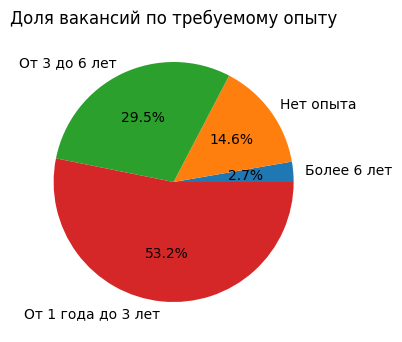

In [27]:
# визуализация df result_4_5

fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    result_4_5['cnt'],
    labels=result_4_5['experience'],
    autopct='%.1f%%'
)
axes.set_title('Доля вакансий по требуемому опыту')
fig.show()
plt.savefig('graphs/Визуализация_4.png');

*Наибольшее число вакансий - 52,3% - предполагает наличие от 1 до 3 лет опыта работы.
Вообще распределение вакансий по опыту можно объянить следующим образом.
Чем выше требования к квалификации и опыту сотрудника, т.е. чем более высококлассный специалист требуется,
тем меньше таких предложений. Т.к. это уровень middle или senior, их конечно меньше, чем junior.
Категория "Нет опыта" может отражать вакансии с самыми минимальными требованиями к кандидатам.*

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [28]:
# текст запроса
query_5_1 = f'''
(
-- первая выборка для выбора работодателя на 1-ом месте по количеству вакансий
-- вывод количества вакансий и названия работодателя
    select
        count(*) as cnt,
        e.name
    from
-- основная таблица Вакансии, соединяем с Работодателями
        public.vacancies v
        join public.employers e on v.employer_id = e.id
    group by
-- для подсчета количества вакансий группируем по id работодателя
        e.id
    order by
-- отсортируем вывод по убыванию количества и оставим только 1 запись
        cnt desc
    limit
        1
)
union
(
-- вторая выборка для выбора работодателя на 5-ом месте по количеству вакансий
-- вывод количества вакансий и названия работодателя
    select
        count(*) as cnt,
        e.name
    from
        public.vacancies v
        join public.employers e on v.employer_id = e.id
    group by
        e.id
    order by
-- отсортируем вывод по убыванию количества, первые 4 записи пропустим и выведем одну
        cnt desc
    offset
        4
    limit
        1
)
-- объединенный вывод двух выборок отсортируем по убыванию количества вакансий
order by
    cnt desc
'''
result_5_1 = pd.read_sql_query(query_5_1, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\1940173147.py:46: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [29]:
# результат запроса
result_5_1

,cnt,name
0,1933,Яндекс
1,331,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [30]:
# текст запроса
query_5_2 = f'''
select
-- выводим названия регионов, количество вакансий и количество работодателей
    a.name area,
    count(v.id) vacancies_cnt,
    count(e.id) employers_cnt
from
-- основаня таблица Регионы, присоединяем Вакансии и Работодатели по равенству id
    public.areas a
    left join public.vacancies v on a.id = v.area_id
    left join public.employers e on a.id = e.area
group by
-- для подсчета количества вакансий и работодателей группируем записи по id региона
    a.id
order by
-- сортируем вывод по возрастанию количества вакансий и убыванию количества работодателей, оставляем одну запись
    vacancies_cnt asc,
    employers_cnt desc
limit
    1
'''
result_5_2 = pd.read_sql_query(query_5_2, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\3872409475.py:23: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [31]:
# результат запроса
result_5_2

,area,vacancies_cnt,employers_cnt
0,Россия,0,410


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [32]:
# текст запроса
query_5_3 = f'''
select
-- выводим название работодателя и количества регионов, distinct - чтобы выбрать уникальные регионы без дублей
    e.name,
    count(distinct v.area_id) cnt
from
-- основная таблица Работодатели, соединяем с Вакансиями по равенству id работодателя
    public.employers e
    join public.vacancies v on e.id = v.employer_id
group by
-- для расчета количества регионов группируем записи по Id и наименованию работодателя
    e.id,
    e.name
order by
-- сортируем вывод по количеству регионов в убывающем порядке
    cnt desc
'''
result_5_3 = pd.read_sql_query(query_5_3, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\257050543.py:19: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [33]:
# результат запроса
result_5_3

,name,cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14901,НПП Авиатрон,1
14902,Центр дистанционных торгов,1
14903,Городские Телекоммуникационные Системы,1
14904,"Введенский, Отель",1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [34]:
# текст запроса
query_5_4 = f'''
-- сформируем промежуточную выборку
with
    x as (
        -- выберем сначала всех работодателей из таблица Работодатели
        select
            e.id
        from
            public.employers e -- исключим тех, у кого указаны сферы деятельности, т.е. их id есть в таблице employers_industries
        except
        select
            i.employer_id
        from
            public.employers_industries i
    )
select
    -- посчитаем количество записей в промежуточной выборке
    count(*)
from
    x
'''
result_5_4 = pd.read_sql_query(query_5_4, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\1103927976.py:23: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [35]:
# результат запроса
result_5_4

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [36]:
# текст запроса
query_5_5 = f'''
select
-- выводим название работодателя и количество сфер деятельности
    e.name,
    count(*) cnt
from
--основная таблица - Работодатели, соединяем с таблицей employers_industries по равенству id работодателя
    public.employers e
    join public.employers_industries i on e.id = i.employer_id
group by
-- для подсчета количества сфер деятельности группируем записи по id и названию работодателя
    e.id,
    e.name
having
-- в группированных данных оставим только те, где количество сфер деятельности = 4
    count(*) = 4
order by
-- отсортируем вывод по названию работодателя, пропустим первые 2 записи и оставим одну
    e.name
offset
    2
limit
    1
'''
result_5_5 = pd.read_sql_query(query_5_5, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\1842478884.py:26: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [37]:
# результат запроса
result_5_5

,name,cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [38]:
# текст запроса
query_5_6 = f'''
select
    count(*) cnt
from
    public.employers_industries e
    join public.industries i on e.industry_id = i.id
where
    i.name = 'Разработка программного обеспечения'
'''
result_5_6 = pd.read_sql_query(query_5_6, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\2655026971.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [39]:
# результат запроса
result_5_6

,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [40]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
result = pd.read_html(url)[1]

# для удобства использования перечня в коде, переведем дарафрейм сначала в список,а затем его в кортеж, чтобы были круглые скобки
million_city = tuple(result['Город'].values.tolist())

# проверим вывод
print(million_city)

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград')


In [41]:
# текст запроса
query_5_7 = f'''
(
    -- первая выборка - данные по регионам
    select
        -- выводим название региона и количество работодателей
        a.name,
        count(*) cnt
    from
        -- основная таблица Регионы, соединим с Вакансиями по id региона для посчета количества вакансий,
        -- а затем с таблицей Работодателей по равенству id работодателя для выбора по названию работодателя
        public.areas a
        join public.vacancies v on a.id = v.area_id
        join public.employers e on v.employer_id = e.id
    where
        -- список городов-миллионников возьмем из переменной million_city, куда положили их в предыдущем параграфе
        a.name in { million_city }
        and e.name = 'Яндекс'
    group by
        -- для подсчета количества вакансий группируем записи по id региона
        a.id
)
union
(
    -- вторая выборка - суммарное количество вакансий (Total) у Яндекса
    -- все то же самое, что в первой выборке, только не группируем по регионам
    select
        'Total',
        count(*)
    from
        public.areas a
        join public.vacancies v on a.id = v.area_id
        join public.employers e on v.employer_id = e.id
    where
        a.name in { million_city }
        and e.name = 'Яндекс'
)
'''
result_5_7 = pd.read_sql_query(query_5_7, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\3636844046.py:39: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [42]:
# результат запроса
result_5_7

,name,cnt
0,Total,485
1,Волгоград,24
2,Воронеж,32
3,Екатеринбург,39
4,Казань,25
5,Краснодар,30
6,Красноярск,23
7,Москва,54
8,Нижний Новгород,36
9,Новосибирск,35


***

# Выводы по анализу работодателей

*Если ранее мы сделали вывод, что в среднем на одного работодателя приходится 2 вакансии, то теперь может уточнить, что количество вакансий достаточно вариативно. Есть работодатели, формирующие бОльшую часть рынка вакансий, причем и по количеству вакансий, и по географии их размещения.*

In [43]:
# преобразуем запрос query_5_1 чтобы показать топ-10 работодателей по числу вакансий
query_tmp = f'''
-- вывод количества вакансий и названия работодателя
    select
        count(*) as cnt,
        e.name
    from
-- основная таблица Вакансии, соединяем с Работодателями
        public.vacancies v
        join public.employers e on v.employer_id = e.id
    group by
-- для подсчета количества вакансий группируем по id работодателя
        e.id
    order by
-- отсортируем вывод по убыванию количества и оставим только 10 записей
        cnt desc
    limit
        10
'''
result_tmp = pd.read_sql_query(query_tmp, connection)

#визуализация топ-10 работодателей
fig = px.bar(
    data_frame=result_tmp,
    x="name",
    y="cnt",
    color='name',
    text = 'cnt',
    orientation='v',
    height=500, 
    width=1000,
    title='Топ-10 работодателей по количеству вакансий',
    labels = dict(x = 'Работодатель', y='Количество вакансий')
)
fig.show()
fig.write_html('graphs/Визуализация_5.html');

C:\Users\user\AppData\Local\Temp\ipykernel_7340\2591034019.py:20: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



*Видим безусловного лидера по числу вакансий - Яндекс. В целом же, помимо Яндекс, у которого в одних только городах-миллионниках размещено 485 вакансий, топ-10 состоит преимущественно из крупных компаний, в которых ИТ-направление является собственно основной существования бизнеса. Это финансовый сектор и телеком. Масштабы бизнеса этих компаний таковы, что во многих из них ИТ-функция выделена в отдельной направление со значительным штатом. Также для них характерен набор сотрудников в широкой географии как за счет физического присутствия во многих регионах, так и за счет распространяющейся практики удаленного режима работы. Например, Яндекс публикуем свои вакансии в 183 регионах, а Ростелеком - в 152. 
Если же посмотреть на сферы деятельности, в которых работают компании, то тут тоже интересные результаты.
Из 23501 работодателя 8419, то есть более 1/3, не указывают сферу деятельности. Скорее всего, это небольшие работодатели, для которых подбор сотрудников нечастое занятие, поэтому их профиль на HH заполнен в минимальном наполнении.
При этом у 3553 работодателей, что составляет примерно 15% от их общего количества, указана сфера деятельности "Разработка программного обеспечения". Интересно, какие еще сферы деятельности наиболее часто встречаются. Для этого выполним необходимую выборку и покажем результат на графике.*

In [44]:
# выборка сфер деятельности и их частоты
query_tmp= f'''
select
-- выводим название работодателя и количество сфер деятельности
    i.name "Сфера деятельности",
    count(*) "Количество работодателей"
from
--основная таблица - employers_industries, соединяем с industries по равенству id отрасли
    public.employers_industries ie
    join public.industries i on ie.industry_id = i.id
group by
-- для подсчета количества сфер деятельности группируем записи по id и названию работодателя
    i.id,
    i.name
order by
-- отсортируем вывод по названию частоте указания отрасли, оставим топ-10
    count(*) desc
limit
    10
'''
result_tmp = pd.read_sql_query(query_tmp, connection)

# визуализируем результат
fig = px.bar(
    data_frame=result_tmp,
    x='Сфера деятельности',
    y='Количество работодателей',
    color='Количество работодателей',
    text = 'Количество работодателей',
    orientation='v',
    height=500, 
    width=1000,
    title='Топ-10 сфер деятельности по количеству работодателей',
    labels = dict(x = 'Сфера деятельности', y='Количество работодателей')
)
fig.show()
fig.write_html('graphs/Визуализация_6.html');

C:\Users\user\AppData\Local\Temp\ipykernel_7340\4187170062.py:21: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



*Ожидаемый результат в том, что на первых позициях сферы деятельности, явно указывающие на ИТ - разработка программного обеспечения, системная интеграция и автоматизация, интернет-компании. Интересно также, что топ-10 включает в себя сферы деятельности, косвенно связанные с ИТ - дизайн, интернет-коммерцию,консалтинговые услуги. Есть даже розничная торговля.
Этот перечень, можно сказать, демонстрирует те отрасли, которые перспективны с точки зрения поиска занятости в ИТ или смежных профессиях.*

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [45]:
# текст запроса
query_6_1 = f'''
select
    -- выводим количество записей
    count(*) cnt
from
    public.vacancies v
where
-- для исключения влияния регистра, приводим значения полей к нижнему регистру
    lower(v.name) like '%data%'
    or lower(v.name) like '%данн%'
'''
result_6_1 = pd.read_sql_query(query_6_1, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\2532977717.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [46]:
# результат запроса
result_6_1

,cnt
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [47]:
# текст запроса
query_6_2 = f'''
select
    -- выводим количество записей
    count(*)
from
    public.vacancies v
where
    (
        -- для исключения влияния регистра переводим значения полей в нижний регистр.
        -- это блок условий, включающих записи в выборку DS по названию вакансии
        lower(v.name) like '%data scientist%'
        or lower(v.name) like '%data science%'
        or lower(v.name) like '%исследователь данных%'
        or v.name like '%ML%'
        or lower(v.name) like '%machine learning%'
        or lower(v.name) like '%машинн%обучен%'
    )
    and (
        -- блок условий, включающих записи в выборку по похожести на вакансию junior-специалиста
        lower(v.name) like '%junior%'
        or lower(v.experience) = 'нет опыта'
        or lower(v.employment) = 'Стажировка'
    ) 
    -- исключим вакансии, связанные с HTML
    and lower(v.name) not like '%html%'
    
'''
result_6_2 = pd.read_sql_query(query_6_2, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\1824005147.py:29: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [48]:
# результат запроса
result_6_2

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [49]:
# текст запроса
query_6_3 = f'''
select
    -- выводим количество записей
    count(*)
from
    public.vacancies v
where
    (
        -- для исключения влияния регистра переводим значения полей в нижний регистр.
        -- это блок условий, включающих записи в выборку DS по названию вакансии
        lower(v.name) like '%data scientist%'
        or lower(v.name) like '%data science%'
        or lower(v.name) like '%исследователь данных%'
        or v.name like '%ML%'
        or lower(v.name) like '%machine learning%'
        or lower(v.name) like '%машинн%обучен%'
    )
    -- исключим вакансии, связанные с HTML
    and lower(v.name) not like '%html%'
    -- и уточним, что в требуемых навыках должны быть sql или postgresql
    and (
        lower(v.key_skills) like '%sql%'
        or lower(v.key_skills) like '%postgres%'
    )
    
'''
result_6_3 = pd.read_sql_query(query_6_3, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\2541940553.py:28: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [50]:
# результат запроса
result_6_3

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [51]:
# текст запроса
query_6_4 = f'''
select
    -- выводим количество записей
    count(*)
from
    public.vacancies v
where
    (
        -- для исключения влияния регистра переводим значения полей в нижний регистр.
        -- это блок условий, включающих записи в выборку DS по названию вакансии
        lower(v.name) like '%data scientist%'
        or lower(v.name) like '%data science%'
        or lower(v.name) like '%исследователь данных%'
        or v.name like '%ML%'
        or lower(v.name) like '%machine learning%'
        or lower(v.name) like '%машинн%обучен%'
    )
    -- исключим вакансии, связанные с HTML
    and lower(v.name) not like '%html%'
    -- и уточним, что в требуемых навыках должен быть python
    and lower(v.key_skills) like '%python%'
'''
result_6_4 = pd.read_sql_query(query_6_4, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\2417699715.py:24: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [52]:
# результат запроса
result_6_4

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [53]:
# текст запроса
query_6_5 = f'''
with
    x as (
        select
            (
                -- рассчитаем количество навыков как разницк между длинной поля начальной
                -- и длинной поля после удаления из него знаков переноса строки CHR(9),
                -- которыми отделяются навыки друг от друга; при этом к разнице добавим 1,
                -- т.к.количество разделителей на 1 больше количества разделяемых элементов
                length(v.key_skills) - length(replace(v.key_skills, CHR(9), '')) + 1
            ) skills_count
        from
            public.vacancies v
        where
            -- расчет только по тем записям, где скилы указаны
            v.key_skills is not null
            and (
                -- для исключения влияния регистра переводим значения полей в нижний регистр.
                -- это блок условий, включающих записи в выборку DS по названию вакансии
                lower(v.name) like '%data scientist%'
                or lower(v.name) like '%data science%'
                or lower(v.name) like '%исследователь данных%'
                or v.name like '%ML%'
                or lower(v.name) like '%machine learning%'
                or lower(v.name) like '%машинн%обучен%'
            )
            -- исключим вакансии, связанные с HTML
            and lower(v.name) not like '%html%'
    )
select
    -- рассчитаем по временной выборке среднее количество скилов с округлением до сотых
    round(avg(x.skills_count), 2) avg_skills
from
    x
'''
result_6_5 = pd.read_sql_query(query_6_5, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\4191017080.py:37: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [54]:
# результат запроса
result_6_5

,avg_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [55]:
# текст запроса
query_6_6 = f'''
with
    x as (
        select
            -- выведем требуемый опыт вакансии
            v.experience,
            (
                -- рассчитаем среднюю ЗП вакансии как сумму ОТ+ДО, деленную на 2,
                -- при этом если не указано ОТ или ДО,
                -- то средняя ЗП вакансии равна оставшемуся значению
                coalesce(v.salary_from, v.salary_to) + coalesce(v.salary_to, v.salary_from)
            ) / 2 salary_avg
        from
            public.vacancies v
        where
            (
                -- для расчетов используем только записи, где заполнено хотя бы одно из полей
                -- с желаемой ЗП ОТ или ДО 
                v.salary_to is not null
                or v.salary_from is not null
            )
            and (
                -- для исключения влияния регистра переводим значения полей в нижний регистр.
                -- это блок условий, включающих записи в выборку DS по названию вакансии
                lower(v.name) like '%data scientist%'
                or lower(v.name) like '%data science%'
                or lower(v.name) like '%исследователь данных%'
                or v.name like '%ML%'
                or lower(v.name) like '%machine learning%'
                or lower(v.name) like '%машинн%обучен%'
            )
            -- исключим вакансии, связанные с HTML
            and lower(v.name) not like '%html%'
    )
select
    -- рассчитаем по временной выборке среднюю ЗП с округлением до целых, и требуемый опыт
    round(avg(x.salary_avg)) average_salary,
    x.experience
FROM
    x
group by
    -- для расчета среднего данные будем группировать по требуемому опыту
    x.experience

'''
result_6_6 = pd.read_sql_query(query_6_6, connection)

C:\Users\user\AppData\Local\Temp\ipykernel_7340\151178001.py:47: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [56]:
# результат запроса
result_6_6

,average_salary,experience
0,243115.0,От 3 до 6 лет
1,139675.0,От 1 года до 3 лет
2,74643.0,Нет опыта


***

# Выводы по предметному анализу

*Посмотрим на рынок вакансий, связанных с данными.
Всего таких вакансий 1771. Много это или мало, отдельно по анализу вакансий трудно заключить, нужно соспоставлять с анализом базы резюме - сколько соискателей ищут работу в этом направлении.
При этом, для начинающего дата-сайентиста всего 51 вакансия, что очень мало. Расширить обрасть поиска работы для начинающего специалиста можно было за счет включения в поиск вакансий, в которых требуется знание применяемых в дата-сайенс инструментов - SQL/Postgres и Python, что уже увеличивает число потенциальных вакансий с 51 до 552 (количество вакансий, в которых требуется знание SQL/Python/Postgres). Это же число - 552 - показывает нам, что почти в 1/3 вакансий DS явным образом указано знание указанных языков. Это еще раз показывает распространенность их применения в DS и актуальность изучения начинающими дата-сайентистами.
При этом обращает на себя внимание динамика роста зарплаты в зависимости от опыта сайентиста. Так, для если для новичка она в среднем составляет 74,6 тыс. руб., то спустя 1-3 года работы - уже 139,7 тыс. руб., а после 3 лет работы в среднем уже 243,1 тыс. руб. Вероятно, такая динамика объясняется ростом сложности предстоящих задач, требующих применение большего количества инструментов анализа.
В дополнение к этому рассмотрим, какие работодатели предлагают самые высокие зарплаты.*

In [57]:
# текст запроса
query_tmp = f'''
with
    x as (
        select
            -- выведем название работодателя и среднюю ЗП
            (
                -- рассчитаем среднюю ЗП вакансии как сумму ОТ+ДО, деленную на 2,
                -- при этом если не указано ОТ или ДО,
                -- то средняя ЗП вакансии равна оставшемуся значению
                coalesce(v.salary_from, v.salary_to) + coalesce(v.salary_to, v.salary_from)
            ) / 2 salary_avg,
            e.name
        -- основная таблица Вакансии, соединяем с Работодателями
        from
            public.vacancies v
            join public.employers e on v.employer_id = e.id
        where
            (
                -- для расчетов используем только записи, где заполнено хотя бы одно из полей
                -- с желаемой ЗП ОТ или ДО 
                v.salary_to is not null
                or v.salary_from is not null
            )
            and (
                -- для исключения влияния регистра переводим значения полей в нижний регистр.
                -- это блок условий, включающих записи в выборку DS по названию вакансии
                lower(v.name) like '%data scientist%'
                or lower(v.name) like '%data science%'
                or lower(v.name) like '%исследователь данных%'
                or v.name like '%ML%'
                or lower(v.name) like '%machine learning%'
                or lower(v.name) like '%машинн%обучен%'
            )
            -- исключим вакансии, связанные с HTML
            and lower(v.name) not like '%html%'
    )
select
    -- рассчитаем по временной выборке среднюю ЗП с округлением до целых, и требуемый опыт
    avg(x.salary_avg) "Средняя ЗП",
    x.name "Работодатель"
FROM
    x
group by
    -- для расчета среднего данные будем группировать по работодателю, оставим топ-10
    name
order by
    1 desc
limit 10
'''
result_tmp = pd.read_sql_query(query_tmp, connection)

# визуализируем данные
fig = px.bar(
    data_frame=result_tmp,
    x='Работодатель',
    y='Средняя ЗП',
    color='Работодатель',
    text = 'Средняя ЗП',
    orientation='v',
    height=500, 
    width=1000,
    title='Топ-10 работодателей по предлагаемой средней ЗП'
)
fig.write_html('graphs/Визуализация_7.html')
fig.show();


C:\Users\user\AppData\Local\Temp\ipykernel_7340\2176512262.py:51: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



*Видно, что в топ-10 работодателей по предлагаемой средней ЗП не вошли работодатели из числа топ-10 по количеству вакансий.*

# Общий вывод по проекту

*Проанализировав представленную базу вакансий, в том числе с учетом дополнительно проведенных в юнитах исследованиях,
можно сделать следующие выводы:
1 Вакансий самих по себе в сфере ИТ и смежных отраслях достаточно много.
2 География вакансий обширна, в том числе за счет распространения режима удаленной работы.
3 Наиболее "мощными" по числу вакансий являются отрасли - финансовая и телеком.
4 Для специалистов в области дата-сайенс вакансий скорее не много, но
5 Небольшое количество вакансий в области DS вознаграждается высоким ростом ЗП по мере увеличения опыта.*

*Продолжить исследование можно было анализом в совокупности базы вакансий и базы резюме, чтобы посмотреть, как соотносится предложение и спрос, какая конкуренция среди работодателей или соискателей.*